In [1]:
from matplotlib.patches import ConnectionPatch
import matplotlib.pyplot as plt
import numpy as np
import scipy.spatial.distance as dist
import pandas as pd

In [2]:
def dp(dist_mat):
    

    N, M = dist_mat.shape
    
    # Initialize the cost matrix
    cost_mat = np.zeros((N + 1, M + 1))
    for i in range(1, N + 1):
        cost_mat[i, 0] = np.inf
    for i in range(1, M + 1):
        cost_mat[0, i] = np.inf

    # Fill the cost matrix while keeping traceback information
    traceback_mat = np.zeros((N, M))
    for i in range(N):
        for j in range(M):
            penalty = [
                cost_mat[i, j],      # match (0)
                cost_mat[i, j + 1],  # insertion (1)
                cost_mat[i + 1, j]]  # deletion (2)
            i_penalty = np.argmin(penalty)
            cost_mat[i + 1, j + 1] = dist_mat[i, j] + penalty[i_penalty]
            traceback_mat[i, j] = i_penalty

    # Traceback from bottom right
    i = N - 1
    j = M - 1
    path = [(i, j)]
    while i > 0 or j > 0:
        tb_type = traceback_mat[i, j]
        if tb_type == 0:
            # Match
            i = i - 1
            j = j - 1
        elif tb_type == 1:
            # Insertion
            i = i - 1
        elif tb_type == 2:
            # Deletion
            j = j - 1
        path.append((i, j))

    # Strip infinity edges from cost_mat before returning
    cost_mat = cost_mat[1:, 1:]
    return (path[::-1], cost_mat)

# Univariate examples







Example 1

(-0.8, 16.8, 2.25, 7.75)

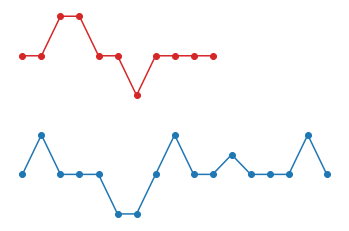

In [3]:
x = np.array([0, 0, 1, 1, 0, 0, -1, 0, 0, 0, 0])+5
y = np.array([0, 1,0, 0,0, -1, -1, 0, 1,0, 0, 0.5, 0, 0, 0,1, 0])+5

plt.figure(figsize=(6, 4))
plt.plot(np.arange(x.shape[0]), x + 1.5, "-o", c="C3")
plt.plot(np.arange(y.shape[0]), y - 1.5, "-o", c="C0")
plt.axis("off")


In [4]:
# Distance matrix
N = x.shape[0]
M = y.shape[0]
dist_mat = np.zeros((N, M))
for i in range(N):
    for j in range(M):
        dist_mat[i, j] = abs(x[i] - y[j])

Alignment cost: 2.5000
Normalized alignment cost: 0.0893


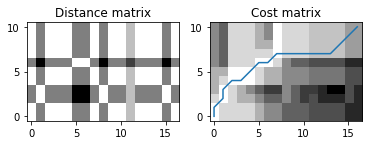

In [5]:
# DTW
path, cost_mat = dp(dist_mat)
print("Alignment cost: {:.4f}".format(cost_mat[N - 1, M - 1]))
print("Normalized alignment cost: {:.4f}".format(cost_mat[N - 1, M - 1]/(N + M)))

plt.figure(figsize=(6, 4))
plt.subplot(121)
plt.title("Distance matrix")
plt.imshow(dist_mat, cmap=plt.cm.binary, interpolation="nearest", origin="lower")
plt.subplot(122)
plt.title("Cost matrix")
plt.imshow(cost_mat, cmap=plt.cm.binary, interpolation="nearest", origin="lower")
x_path, y_path = zip(*path)
plt.plot(y_path, x_path);

(-0.8, 16.8, 2.25, 7.75)

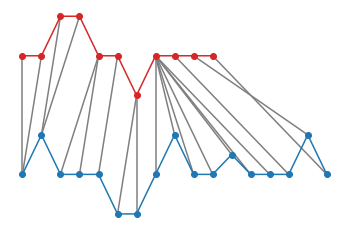

In [6]:
plt.figure()
for x_i, y_j in path:
    plt.plot([x_i, y_j], [x[x_i] + 1.5, y[y_j] - 1.5], c="C7")
plt.plot(np.arange(x.shape[0]), x + 1.5, "-o", c="C3")
plt.plot(np.arange(y.shape[0]), y - 1.5, "-o", c="C0")
plt.axis("off")

Alignment cost: 2.5000
Normalized alignment cost: 0.0893

Alignment cost: 1.7500
Normalized alignment cost: 0.0875

Alignment cost: 4.5000
Normalized alignment cost: 0.1500



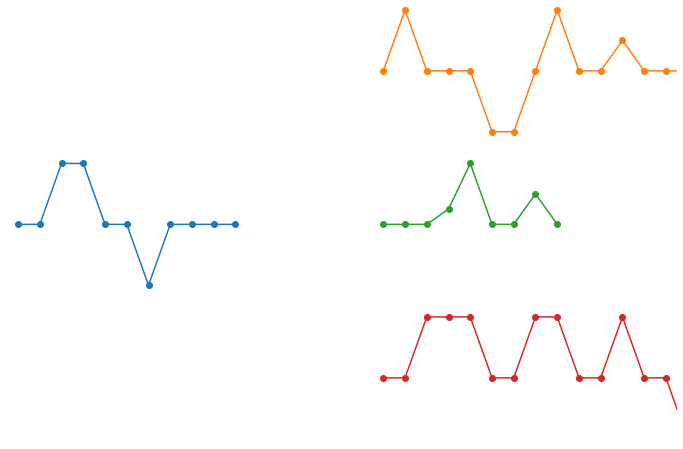

In [7]:
a = np.array([0, 0, 1, 1, 0, 0, -1, 0, 0, 0, 0])
b = np.array([0, 0,1,1,1, 0, 0, 1, 1,0, 0,1, 0, 0, -1, -0.5, 0,1, 0])
c = np.array([0, 1,0, 0,0, -1, -1, 0, 1,0, 0, 0.5, 0, 0, 0,1, 0])
d = np.array([0, 0,0, 0.25, 1, 0,0, 0.5, 0])

fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(323)
ax2 = fig.add_subplot(322)
ax3 = fig.add_subplot(324)
ax4 = fig.add_subplot(326)
# fig = plt.figure(figsize=(6, 8))
ax1.plot(np.arange(a.shape[0]), a, "-o", c="C0")
ax2.plot(np.arange(c.shape[0]), c, "-o", c="C1")
ax3.plot(np.arange(d.shape[0]), d, "-o", c="C2")
ax4.plot(np.arange(b.shape[0]), b, "-o", c="C3")
for ax in [ax1, ax2, ax3, ax4]:
    ax.axis("off")
    ax.set_xlim([-0.5, 13.5])
    ax.set_ylim([-1.05, 1.05])

    
for cur_b in [c, d, b]:

    # Distance matrix
    N = a.shape[0]
    M = cur_b.shape[0]
    dist_mat = np.zeros((N, M))
    for i in range(N):
        for j in range(M):
    #         print(a[i], b[j], abs(a[i] - b[j]))
            dist_mat[i, j] = abs(a[i] - cur_b[j])

    # DTW
    path, cost_mat = dp(dist_mat)
    print("Alignment cost: {:.4f}".format(cost_mat[N - 1, M - 1]))
    print("Normalized alignment cost: {:.4f}".format(cost_mat[N - 1, M - 1]/(N + M)))
    print()

 Example 2


(0.7, 7.3, -1.75, 3.75)

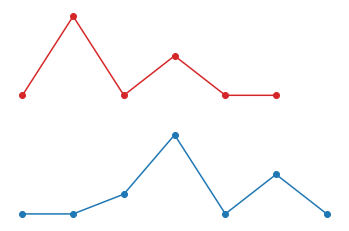

In [8]:
x = np.array([0, 2, 0, 1, 0, 0])
y = np.array([0, 0, 0.5, 2, 0, 1, 0])

plt.figure(figsize=(6, 4))
plt.plot(np.arange(x.shape[0]) + 1, x + 1.5, "-o", c="C3")
plt.plot(np.arange(y.shape[0]) + 1, y - 1.5, "-o", c="C0")
plt.axis("off")


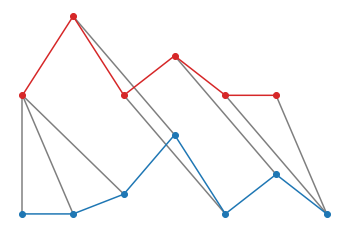

In [9]:
# Distance matrix
N = x.shape[0]
M = y.shape[0]
dist_mat = np.zeros((N, M))
for i in range(N):
    for j in range(M):
        dist_mat[i, j] = abs(x[i] - y[j])

# DTW
path, cost_mat = dp(dist_mat)

# Plot alignment
plt.figure(figsize=(6, 4))
for x_i, y_j in path:
    plt.plot([x_i, y_j], [x[x_i] + 1.5, y[y_j] - 1.5], c="C7")
plt.plot(np.arange(x.shape[0]), x + 1.5, "-o", c="C3")
plt.plot(np.arange(y.shape[0]), y - 1.5, "-o", c="C0")
plt.axis("off");

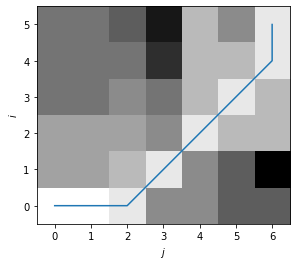

In [10]:
plt.figure(figsize=(6, 4))
plt.imshow(cost_mat, cmap=plt.cm.binary, interpolation="nearest", origin="lower")
x_path, y_path = zip(*path)
plt.plot(y_path, x_path)
plt.xlabel("$j$")
plt.ylabel("$i$");

Example 3


(-0.8, 16.8, -1.7, 2.7)

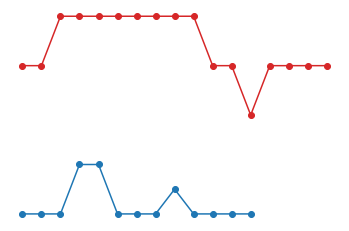

In [11]:
x = np.array([0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, -1, 0, 0, 0, 0])
y = np.array([0, 0, 0, 1, 1, 0, 0, 0, 0.5, 0, 0, 0, 0])

plt.figure(figsize=(6, 4))
plt.plot(np.arange(x.shape[0]), x + 1.5, "-o", c="C3")
plt.plot(np.arange(y.shape[0]), y - 1.5, "-o", c="C0")
plt.axis("off")


Alignment cost: 1.5000
Normalized alignment cost: 0.0500


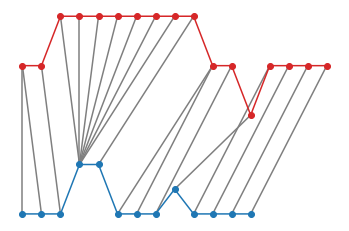

In [12]:
# Distance matrix
N = x.shape[0]
M = y.shape[0]
dist_mat = np.zeros((N, M))
for i in range(N):
    for j in range(M):
        dist_mat[i, j] = abs(x[i] - y[j])

# DTW
path, cost_mat = dp(dist_mat)
print("Alignment cost: {:.4f}".format(cost_mat[N - 1, M - 1]))
print("Normalized alignment cost: {:.4f}".format(cost_mat[N - 1, M - 1]/(N + M)))

# Plot alignment
plt.figure(figsize=(6, 4))
for x_i, y_j in path:
    plt.plot([x_i, y_j], [x[x_i] + 1.5, y[y_j] - 1.5], c="C7")
plt.plot(np.arange(x.shape[0]), x + 1.5, "-o", c="C3")
plt.plot(np.arange(y.shape[0]), y - 1.5, "-o", c="C0")
plt.axis("off");

Multivariate examples

In [13]:
from scipy.io import wavfile
import IPython.display as ipyd
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

22050
22050


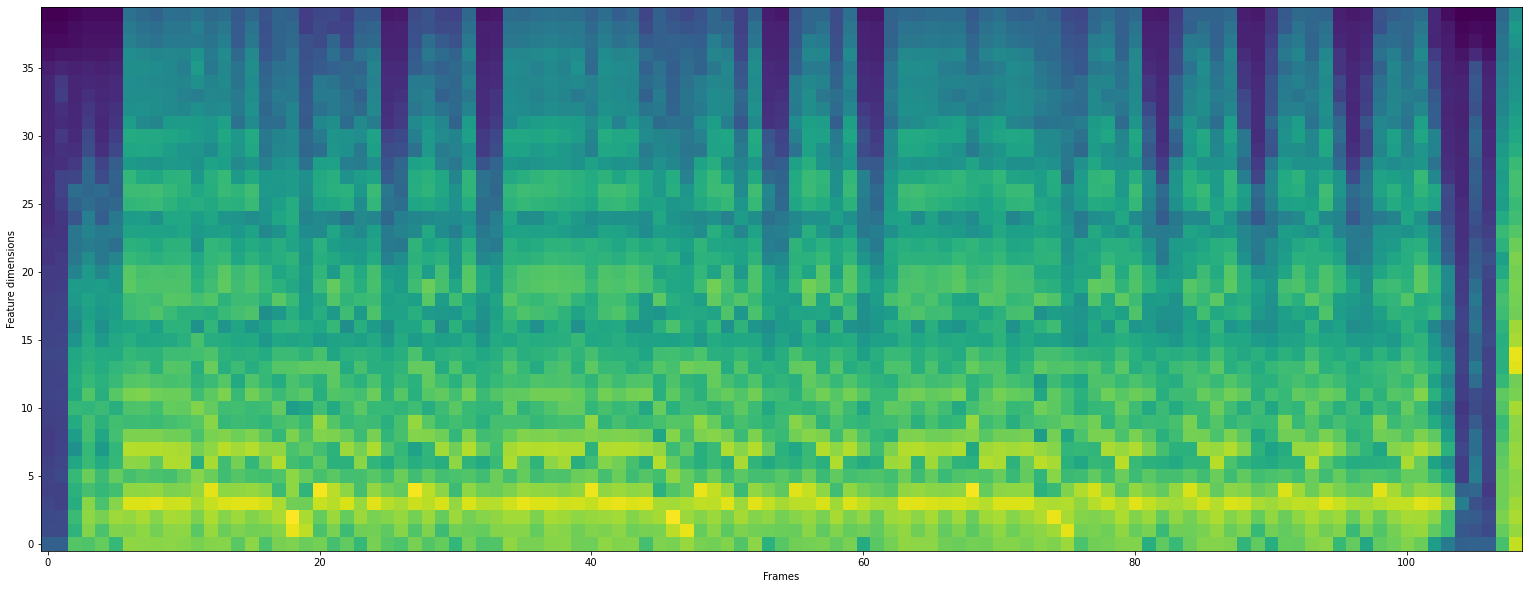

In [14]:

x,f_s2 = librosa.load('C:/Users/KIMO/Desktop/wewillrocku.wav')



# Mel-scale spectrogram
n_fft = int(f_s2)      # 25 ms
print(n_fft)
hop_length = int(f_s2)  # 10 ms
print(hop_length)
mel_spec_x = librosa.feature.melspectrogram(
    x/1.0, sr=f_s2, n_mels=40,
    n_fft=n_fft, hop_length=hop_length
    )
log_mel_spec_x = np.log(mel_spec_x)

# Plot log-Mel spectrogram
fig, ax = plt.subplots(figsize=(30, 10))
ax.imshow(log_mel_spec_x, origin="lower", interpolation="nearest");
plt.ylabel("Feature dimensions")
plt.xlabel("Frames");








22050
22050


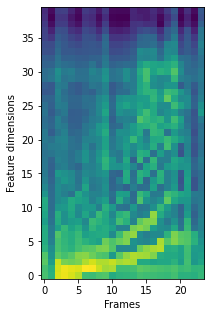

In [15]:
y,f_s = librosa.load('C:/Users/KIMO/Desktop/brb2.wav')

# Mel-scale spectrogram
n_fft = int(f_s)      
print(n_fft)
hop_length = int(f_s)  
print(hop_length)
mel_spec_y = librosa.feature.melspectrogram(
    y/1.0, sr=f_s, n_mels=40,
    n_fft=n_fft, hop_length=hop_length
    )
log_mel_spec_y = np.log(mel_spec_y)

# Plot log-Mel spectrogram
fig, ax = plt.subplots(figsize=(20, 5))
ax.imshow(log_mel_spec_y, origin="lower", interpolation="nearest");
plt.ylabel("Feature dimensions")
plt.xlabel("Frames");



In [16]:
x_seq = log_mel_spec_x.T
y_seq = log_mel_spec_y.T

dist_mat = dist.cdist(x_seq, y_seq, "cosine")
path, cost_mat = dp(dist_mat)
print("Alignment cost: {:.4f}".format(cost_mat[-1, -1]))

Alignment cost: 21.3808


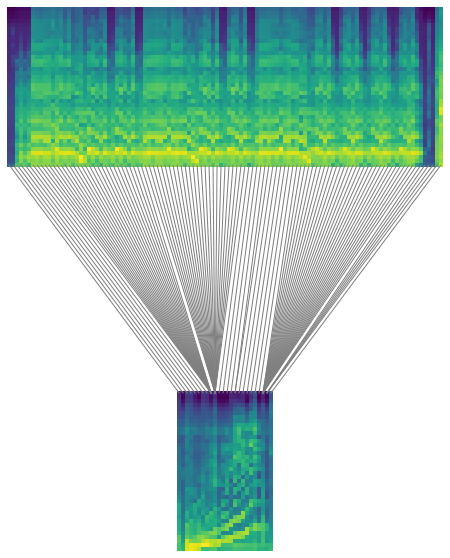

In [17]:
fig = plt.figure(figsize=(9, 10))
ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(313)

ax1.imshow(log_mel_spec_x, origin="lower", interpolation="nearest")
ax2.imshow(log_mel_spec_y, origin="lower", interpolation="nearest")
ax1.axis("off")
ax2.axis("off")

for x_i, y_j in path:
    con = ConnectionPatch(
        xyA=(x_i, 0), xyB=(y_j, log_mel_spec_y.shape[0] - 1), coordsA="data", coordsB="data",
        axesA=ax1, axesB=ax2, color="C7"
        )
    ax2.add_artist(con)

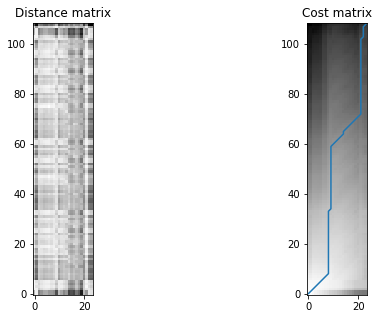

In [18]:
plt.figure(figsize=(9, 5))
plt.subplot(121)
plt.title("Distance matrix")
plt.imshow(dist_mat, cmap=plt.cm.binary, interpolation="nearest", origin="lower")
plt.subplot(122)
plt.title("Cost matrix")
plt.imshow(cost_mat, cmap=plt.cm.binary, interpolation="nearest", origin="lower")
x_path, y_path = zip(*path)
plt.plot(y_path, x_path);

# Test of 32 &0





In [19]:
f = open('C:/Users/KIMO/Desktop/0.txt','r')
a = [',correct']
lst = []
for line in f:
    for word in a:
        if word in line:
            line = line.replace(word,'')
    lst.append(line)
f.close()
f = open('C:/Users/KIMO/Desktop/0.txt','w')
for line in lst:
    f.write(line)
f.close()

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/KIMO/Desktop/0.txt'

In [20]:
df = pd.read_csv('C:/Users/KIMO/Desktop/clean_data.csv')
df = df.dropna()


Alignment cost: 19554.0000
Normalized alignment cost: 23.7883


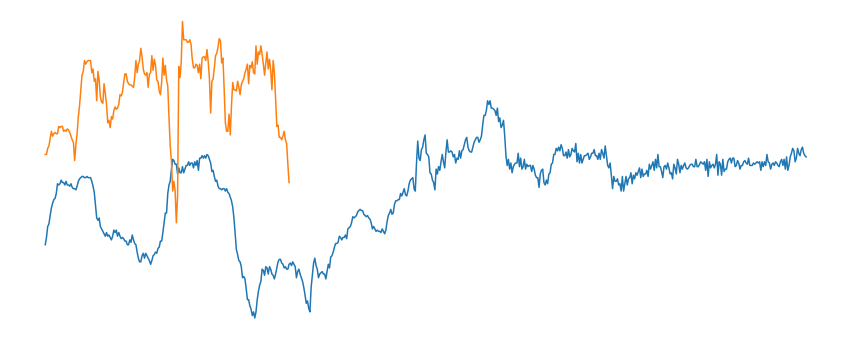

In [21]:
wrist_x_0=np.array(df[df['id'] == 0]['wrist_x']).astype(int)

wrist_x_32 = np.array(df[df['id'] == 15]['wrist_x']).astype(int)

plt.figure(figsize=(15, 6))
plt.plot(np.arange(wrist_x_0.shape[0]), wrist_x_0 )
plt.plot(np.arange(wrist_x_32.shape[0]), wrist_x_32)
plt.axis("off")
# Distance matrix
N = wrist_x_0.shape[0]
M = wrist_x_32.shape[0]
dist_mat = np.zeros((N, M))
for i in range(N):
    for j in range(M):
        dist_mat[i, j] = abs(wrist_x_0[i] - wrist_x_32[j])

# DTW
path, cost_mat = dp(dist_mat)
print("Alignment cost: {:.4f}".format(cost_mat[N - 1, M - 1]))
print("Normalized alignment cost: {:.4f}".format(cost_mat[N - 1, M - 1]/(N + M)))






In [30]:
coor = ["wrist_x", "wrist_y","index_x","index_y","middle_x","middle_y","ring_x","ring_y","pinky_x","pinky_y"]
y = np.array([0])
for m in y:
    for x in coor:
        wrist_x_0=np.array(df[df['id'] == 0][x]).astype(int)
        wrist_x_32 = np.array(df[df['id'] == 32][x]).astype(int)
        # Distance matrix
        N = wrist_x_0.shape[0]
        M = wrist_x_32.shape[0]
        dist_mat = np.zeros((N, M))
        for i in range(N):
            for j in range(M):
                dist_mat[i, j] = abs(wrist_x_0[i] - wrist_x_32[j])
         # DTW
        path, cost_mat = dp(dist_mat)
        print("Alignment cost: {:.4f}".format(cost_mat[N - 1, M - 1]))
        print("Normalized alignment cost: {:.4f}".format(cost_mat[N - 1, M - 1]/(N + M)))
        print(x)



Alignment cost: 24013.0000
Normalized alignment cost: 26.8602
wrist_x
Alignment cost: 9664.0000
Normalized alignment cost: 10.8098
wrist_y
Alignment cost: 58833.0000
Normalized alignment cost: 65.8087
index_x
Alignment cost: 5510.0000
Normalized alignment cost: 6.1633
index_y
Alignment cost: 47978.0000
Normalized alignment cost: 53.6667
middle_x
Alignment cost: 3208.0000
Normalized alignment cost: 3.5884
middle_y
Alignment cost: 35314.0000
Normalized alignment cost: 39.5011
ring_x
Alignment cost: 4487.0000
Normalized alignment cost: 5.0190
ring_y
Alignment cost: 21263.0000
Normalized alignment cost: 23.7841
pinky_x
Alignment cost: 14106.0000
Normalized alignment cost: 15.7785
pinky_y


In [24]:
import numpy as np
from scipy.spatial.distance import euclidean
from fastdtw import fastdtw
import sys

In [25]:
def classOfFDTW(n1,n2):
    smallestDist = sys.maxsize
    smallestInd=0
    MoveNum=0
    for i in n2:
        #change tran data for i which will be the example played
        distance,path=fastdtw(n1,n2,dist=euclidean)
        if(distance<=smallestDist):
            smallestDist=distance
            smallestInd=MoveNum
        MoveNum+=1
    return(smallestDist,smallestInd)
        

In [29]:
wrist_x_0=np.array(df[df['id'] == 0]["wrist_x"]).astype(int)
wrist_x_32 = np.array(df[df['id'] == 32]["wrist_x"]).astype(int)
N = wrist_x_0.shape[0]
M = wrist_x_32.shape[0]
distance, path  = fastdtw(wrist_x_0, wrist_x_32, dist=euclidean)
small,smallind  =  classOfFDTW(wrist_x_0, wrist_x_32)
print(distance)
normdist=(distance/(N+M))
print(normdist)
print(small)
print(smallind)

34271.0
38.334451901566
34271.0
271
